<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/pc_cl_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/PyCaret.png?raw=true)

https://pycaret.org

# **Clasificación**

## **Arbol de decision**

***Un árbol de decisión es un modelo predictivo formado por reglas binarias (si/no) con las que se consigue repartir observaciones del espacio muestral, en función de sus atributos y predecir así el valor de la variable objetivo, o variable dependiente.***

***Muchos métodos predictivos generan modelos en los que una ecuación se aplica a todo el espacio muestral.***

***Cuando el caso de uso implica múltiples predictores, que iteractúan entre ellos de forma compleja y no lineal, es muy difícil encontrar un único modelo global que sea capaz de reflejar la relación entre las distintas variables. El árbol de decisión engloba un conjunto de técnicas supervisadas no paramétricas que consiguen segmentar el espacio de los predictores en regiones simples, dentro de las cuales es más sencillo manejar esas interacciones.***

## **Instalando módulos necesarios**

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 92.5 MB/s eta 0:

In [2]:
from pycaret.utils import version
version()

'3.0.4'

## **Carga de librerías necesarias**

### **Para análisis de datos**

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

### **Para PyCaret**

In [4]:
from pycaret.classification import *

## **Conjunto de Datos**

***El conjunto de datos contiene información sobre la venta de sillas infantiles en 400 tiendas distintas. Para cada una de las 400 tiendas se han registrado 11 variables. Se pretende generar un modelo de clasificación que permita predecir si una tienda tiene ventas altas $>$ 8 o bajas $<=$ 8, en función de todas las variables disponibles.***

***Este analisis es para posteriormente distribuir las sillitas infantiles a las tiendas que tienen mayores ventas, y optimizar la distribución del producto***

### **Extracción de Datos**

In [5]:
sillitas = sm.datasets.get_rdataset("Carseats", "ISLR")

In [6]:
datos = sillitas.data

In [7]:
datos

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [8]:
datos.shape

(400, 11)

### **Información del conjunto de datos**

In [9]:
print(sillitas.__doc__)

.. container::

   ======== ===============
   Carseats R Documentation
   ======== ===============

   .. rubric:: Sales of Child Car Seats
      :name: Carseats

   .. rubric:: Description
      :name: description

   A simulated data set containing sales of child car seats at 400
   different stores.

   .. rubric:: Usage
      :name: usage

   ::

      Carseats

   .. rubric:: Format
      :name: format

   A data frame with 400 observations on the following 11 variables.

   ``Sales``
      Unit sales (in thousands) at each location

   ``CompPrice``
      Price charged by competitor at each location

   ``Income``
      Community income level (in thousands of dollars)

   ``Advertising``
      Local advertising budget for company at each location (in
      thousands of dollars)

   ``Population``
      Population size in region (in thousands)

   ``Price``
      Price company charges for car seats at each site

   ``ShelveLoc``
      A factor with levels ``Bad``, ``Good`` and ``

## **Ingeniería de variables**

***Se observa que la variable ventas es una variable continua y el objetivo del estudio es clasificar las tiendas según si venden mucho o poco, por lo tanto se crea una nueva variable con los siguientes valores (0, 1) denominada ventas_altas.***

In [10]:
datos.insert(1, column = "ventas_altas", value = np.where(datos.Sales > 8, 1, 0))

In [11]:
datos.head()

,Sales,ventas_altas,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,0,141,64,3,340,128,Bad,38,13,Yes,No


***Ahora se procede a eliminar la variable ventas...***

In [12]:
datos.drop(columns = "Sales", inplace = True)
datos.head()

,ventas_altas,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No


## **Configuración del entorno PyCaret**

In [13]:
clasificacion = setup(data = datos,
                      target = "ventas_altas",
                      session_id=123,
                      normalize=True,
                      transformation=True)

,Description,Value
0,Session id,123
1,Target,ventas_altas
2,Target type,Binary
3,Original data shape,"(400, 11)"
4,Transformed data shape,"(400, 13)"
5,Transformed train set shape,"(280, 13)"
6,Transformed test set shape,"(120, 13)"
7,Ordinal features,2
8,Numeric features,7
9,Categorical features,3


## **Modelo**

In [14]:
top_5 = compare_models(n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8786,0.0000,0.8333,0.8769,0.8488,0.7475,0.7542,0.3610
lda,Linear Discriminant Analysis,0.8786,0.9419,0.8333,0.8769,0.8488,0.7475,0.7542,0.2640
lr,Logistic Regression,0.8750,0.9393,0.8341,0.8676,0.8450,0.7405,0.7465,0.7930
gbc,Gradient Boosting Classifier,0.8571,0.9120,0.7659,0.8721,0.8114,0.6981,0.7053,0.4860
ada,Ada Boost Classifier,0.8536,0.9163,0.8000,0.8491,0.8155,0.6948,0.7030,0.6840
xgboost,Extreme Gradient Boosting,0.8429,0.9152,0.7848,0.8385,0.8060,0.6746,0.6810,0.3170
lightgbm,Light Gradient Boosting Machine,0.8286,0.9152,0.7848,0.8074,0.7879,0.6449,0.6539,0.6770
svm,SVM - Linear Kernel,0.8179,0.0000,0.7758,0.7931,0.7800,0.6256,0.6306,0.1960
rf,Random Forest Classifier,0.8143,0.8970,0.6886,0.8514,0.7527,0.6070,0.6233,0.7050
qda,Quadratic Discriminant Analysis,0.7821,0.8612,0.6886,0.7912,0.7241,0.5468,0.5618,0.2670


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [15]:
top_5[0]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [16]:
top_5[1]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [17]:
dt = create_model('dt', fold = 5, round = 2)
print(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.82,0.82,0.78,0.78,0.78,0.63,0.63
1,0.77,0.77,0.78,0.69,0.73,0.53,0.53
2,0.79,0.78,0.74,0.74,0.74,0.56,0.56
3,0.77,0.76,0.70,0.73,0.71,0.52,0.52
4,0.80,0.78,0.65,0.83,0.73,0.58,0.59
Mean,0.79,0.78,0.73,0.75,0.74,0.56,0.57
Std,0.02,0.02,0.05,0.05,0.02,0.04,0.04


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


## **Optimizando el modelo**

In [18]:
optimizar_dt = tune_model(dt, fold = 5, round = 2)
print(optimizar_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.84,0.90,0.78,0.82,0.80,0.67,0.67
1,0.82,0.83,0.78,0.78,0.78,0.63,0.63
2,0.80,0.84,0.74,0.77,0.76,0.59,0.59
3,0.79,0.85,0.65,0.79,0.71,0.55,0.55
4,0.82,0.79,0.65,0.88,0.75,0.62,0.63
Mean,0.81,0.84,0.72,0.81,0.76,0.61,0.61
Std,0.02,0.03,0.06,0.04,0.03,0.04,0.04


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


## **Evaluación del modelo**

In [19]:
evaluate_model(optimizar_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## **Calibración del modelo**

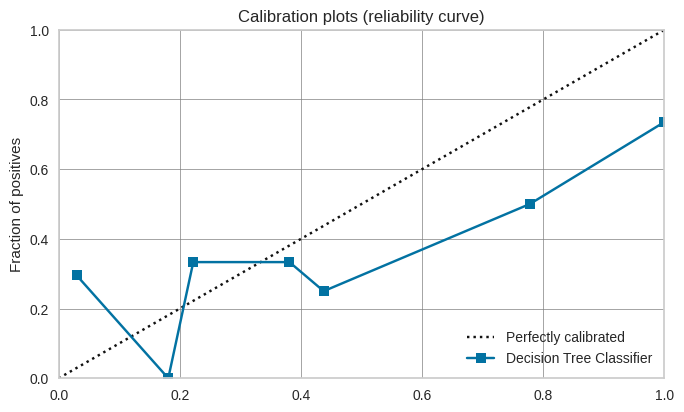

In [20]:
plot_model(optimizar_dt, plot='calibration')

In [21]:
calibrated_dt = calibrate_model(dt, fold = 5, round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.75,0.87,0.61,0.74,0.67,0.47,0.48
1,0.82,0.86,0.83,0.76,0.79,0.64,0.64
2,0.75,0.88,0.52,0.80,0.63,0.45,0.48
3,0.79,0.86,0.70,0.76,0.73,0.55,0.55
4,0.70,0.84,0.52,0.67,0.59,0.35,0.36
Mean,0.76,0.86,0.63,0.75,0.68,0.49,0.50
Std,0.04,0.01,0.12,0.04,0.07,0.10,0.09


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

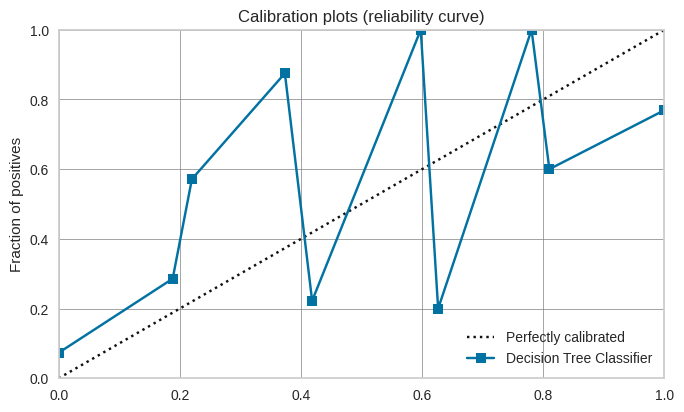

In [22]:
plot_model(calibrated_dt, plot='calibration')

## **Evaluacion del modelo calibrado**

In [23]:
evaluate_model(calibrated_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## **Predicción del modelo**

### **Modelo optimizado**

In [24]:
predict_model(optimizar_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7250,0.7051,0.5306,0.7222,0.6118,0.4065,0.4181


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ventas_altas,prediction_label,prediction_score
270,119,26,0,284,89,Good,26,10,Yes,No,1,1,1.0
90,115,22,0,491,103,Medium,64,11,No,No,0,0,1.0
396,139,23,3,37,120,Medium,55,11,No,Yes,0,0,1.0
71,148,51,16,148,150,Medium,58,17,No,Yes,0,1,1.0
161,143,21,5,81,160,Medium,67,12,No,Yes,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,112,80,5,500,128,Medium,69,10,Yes,Yes,0,0,1.0
225,107,25,0,412,82,Bad,36,14,Yes,No,0,0,1.0
376,141,60,19,319,92,Good,44,11,Yes,Yes,1,1,1.0
313,103,81,3,491,54,Medium,66,13,Yes,No,1,1,1.0


### **Modelo calibrado**

In [25]:
predict_model(calibrated_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7333,0.8122,0.5918,0.7073,0.6444,0.4338,0.4382


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ventas_altas,prediction_label,prediction_score
270,119,26,0,284,89,Good,26,10,Yes,No,1,1,0.6346
90,115,22,0,491,103,Medium,64,11,No,No,0,0,0.8007
396,139,23,3,37,120,Medium,55,11,No,Yes,0,0,0.8007
71,148,51,16,148,150,Medium,58,17,No,Yes,0,1,0.7317
161,143,21,5,81,160,Medium,67,12,No,Yes,0,0,0.8007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,112,80,5,500,128,Medium,69,10,Yes,Yes,0,0,0.8007
225,107,25,0,412,82,Bad,36,14,Yes,No,0,0,0.8007
376,141,60,19,319,92,Good,44,11,Yes,Yes,1,1,0.7317
313,103,81,3,491,54,Medium,66,13,Yes,No,1,1,0.5367


## **Finalización del modelo**

In [26]:
final_dt = finalize_model(optimizar_dt)

In [27]:
print(final_dt)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['CompPrice', 'Income',
                                             'Advertising', 'Population',
                                             'Price', 'Age', 'Education'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),...
                                    transformer=StandardScaler(copy=Tr

## **Guardando el modelo**

In [28]:
save_model(final_dt,'modeloclasificacion')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['CompPrice', 'Income',
                                              'Advertising', 'Population',
                                              'Price', 'Age', 'Education'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),...
                                     transformer=Standard